In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
np.random.seed(1234)
data_train, data_test = train_test_split(data, test_size=0.25)
model=ols("label ~meanfreq+ sd+median+Q25+Q75+IQR+skew+kurt+sfm+mode+centroid+meanfun+minfun+maxfun+meandom+mindom+maxdom+dfrange+modindx",data_train).fit()
model.summary()


NameError: name 'data' is not defined

In [301]:
model=ols("label ~Q75+IQR+skew+sfm+mode+meanfun+minfun+maxfun+meandom",data_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1043.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:22:43   Log-Likelihood:                 180.08
No. Observations:                2376   AIC:                            -340.2
Df Residuals:                    2366   BIC:                            -282.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4711      0.069     -6.843      0.000      -0.606      -0.336
Q75           -1.4129      0.264     -5.346      0.000      -1.931      -0.895
IQR           -3.8828      0.187    -20.757      0.000      -4.250      -3.516
skew           0.0137      0.001     10.866      0.000       0.011       0.016
sfm            0.3183      0.044      7.187      0.000       0.231       0.405
mode          -0.4086      0.085     -4.801      0.000      -0.575      -0.242
meanfun       12.0386      0.183     65.866      0.000      11.680      12.397
minfun        -2.9778      0.282    -10.568      0.000      -3.530      -2.425
maxfun        -0.6059      0.173     -3.499      0.000      -0.945      -0.266
meandom        0.0671      0.011      5.931      0.000       0.045       0.089
==============================================================================
Omnibus:                      104.763   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.338
Skew:                           0.059   Prob(JB):                     3.39e-74
Kurtosis:                       4.845   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
model=ols("label ~IQR+meanfun",data_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3292.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:22:44   Log-Likelihood:                -146.35
No. Observations:                2376   AIC:                             298.7
Df Residuals:                    2373   BIC:                             316.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7982      0.036    -22.120      0.000      -0.869      -0.727
IQR           -2.8409      0.147    -19.369      0.000      -3.128      -2.553
meanfun       10.7624      0.193     55.902      0.000      10.385      11.140
==============================================================================
Omnibus:                       20.516   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.327
Skew:                           0.203   Prob(JB):                     2.34e-05
Kurtosis:                       3.224   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

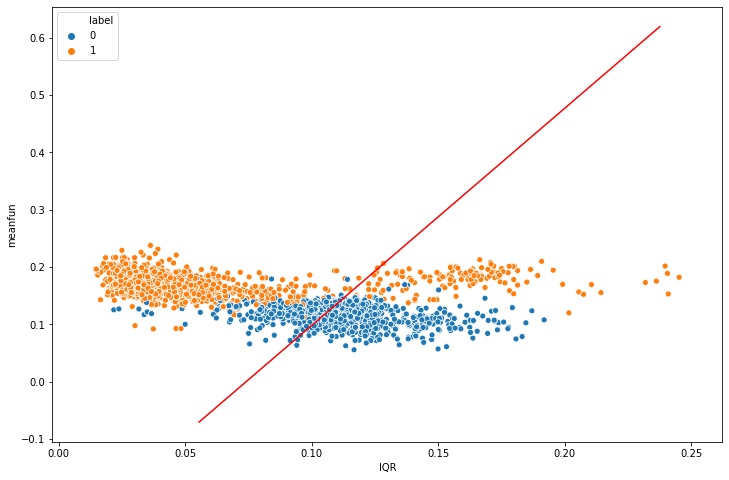

In [303]:
b0 = model.params.Intercept
b1 = model.params.meanfun
b2 = model.params.IQR

m = -b1/b2
q= - b0/b2

x = np.linspace(np.min(data_train.meanfun),np.max(data_train.meanfun),2)
y = m*x+q

plt.figure(figsize=(12,8))
sns.scatterplot('IQR','meanfun',data=data_train ,hue='label')
plt.plot(x,y,'r')
plt.show()

In [239]:
from statsmodels.formula.api import logit
model_c=logit("label ~ sd+skew+kurt+sfm+meanfun+minfun",data_train).fit()
model_c.summary()

Optimization terminated successfully.
         Current function value: 0.105237
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 2376
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                  0.8481
Time:                        20:22:12   Log-Likelihood:                -250.04
converged:                       True   LL-Null:                       -1646.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6559      1.291    -13.678      0.000     -20.186     -15.126
sd          -166.1625     16.208    -10.252      0.000    -197.930    -134.395
skew           0.5968      0.150      3.970      0.000       0.302       0.891
kurt          -0.0103      0.005     -2.240      0.025      -0.019      -0.001
sfm            8.1510      1.222      6.672      0.000       5.757      10.545
meanfun      173.0020      9.268     18.666      0.000     154.837     191.167
minfun       -51.1332      7.970     -6.416      0.000     -66.754     -35.512
==============================================================================
"""

In [312]:
from sklearn.metrics import confusion_matrix
props=model_c.predict(data_test)
test_preds = probs.round().astype(int)
test_gt = data_test.dropna()['label']
confusion_matrix(test_gt, test_preds)

array([[388,  14],
       [ 23, 367]], dtype=int64)

In [321]:
from sklearn.metrics import classification_report
print("\nClassification Report\n",classification_report(test_gt, test_preds))


Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       402
           1       0.96      0.94      0.95       390

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [306]:
np.exp(model.params)

Intercept    2.964822e-08
sd           6.467330e-72
skew         2.022028e+00
kurt         9.862713e-01
sfm          3.704034e+03
meanfun      1.253617e+73
minfun       1.505850e-21
dtype: float64

In [240]:
model_s=logit("label ~kurt",data_train).fit()
model_s.summary()

Optimization terminated successfully.
         Current function value: 0.689750
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 2376
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                0.004717
Time:                        20:22:28   Log-Likelihood:                -1638.8
converged:                       True   LL-Null:                       -1646.6
Covariance Type:            nonrobust   LLR p-value:                 8.101e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0132      0.043      0.310      0.757      -0.070       0.097
kurt          -0.0012      0.000     -3.694      0.000      -0.002      -0.001
==============================================================================
"""

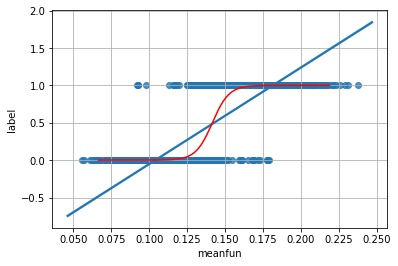

In [308]:
probs = model_s.predict(data_test)
idx=np.argsort(data_test['meanfun'])
sns.regplot('meanfun','label',data)
plt.plot(data_test["meanfun"].values[idx],probs.values[idx],'r')
plt.grid()
plt.show()

In [318]:
test_preds = probs.round().astype(int)
test_gt = data_test.dropna()['label']
confusion_matrix(test_gt, test_preds)

array([[388,  14],
       [ 23, 367]], dtype=int64)

In [320]:
print("\nClassification Report\n",classification_report(test_gt, test_preds))


Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       402
           1       0.96      0.94      0.95       390

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792

